# SF Bar buoy data analysis
Data sourced from CDIP historical data (link) and packaged using quilt.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot

df = pd.read_table('~/dev/lighthouse/scripts/new.txt', delim_whitespace=True, header=2, index_col=0, parse_dates=True)

## Monthly avg height

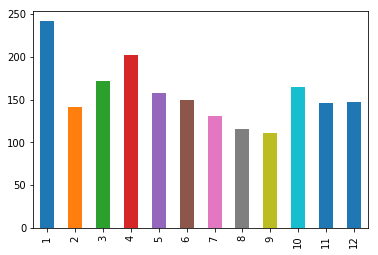

In [34]:
size_by_month = df.groupby(lambda(d): d.month)['(CM)'].mean()
size_by_month.plot.bar()
plot.show()

## Number of surfable deads days


## Daily mean wave height

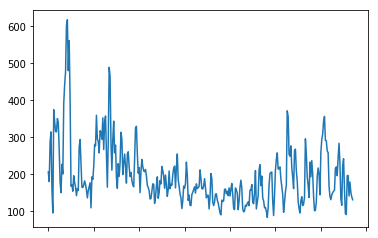

In [3]:
size_by_day = df.groupby(df.index.strftime('%Y-%m-%d'))['(CM)'].max()
size_by_day.plot()
plot.show()

## Rolling 5 day mean height

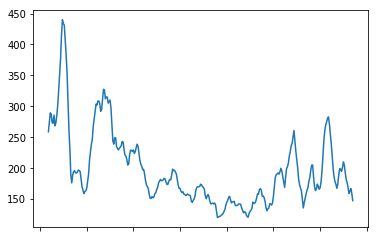

In [12]:
moving_avg = size_by_day.rolling(10).mean()
moving_avg.plot()
plot.show()

## Days with enough swell for deads

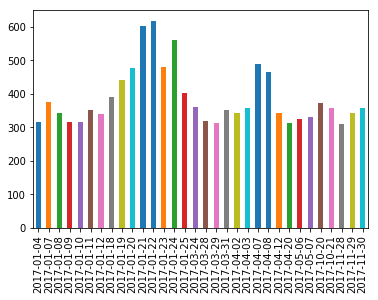

In [19]:
deads_days = size_by_day[size_by_day > 300]
deads_days.plot.bar()
plot.show()

In [32]:
## Days per month of surfable deads

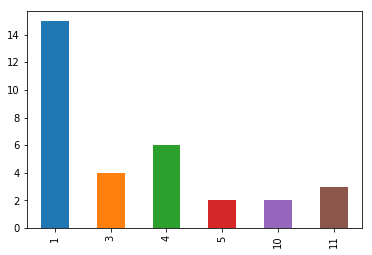

In [23]:
import dateutil
deads_days = size_by_day[size_by_day > 300]
deads_by_month = deads_days.groupby(lambda(d): dateutil.parser.parse(d).month).count()                                   
deads_by_month.plot.bar()
plot.show()

## 9 Band Energy Distribution

In [ ]:
SELECT * FROM buoy
WHERE size > 3 and size < 8
AND (mid_period > 0.25 OR long_period > 0.25)
-- then break out by size bands to check period

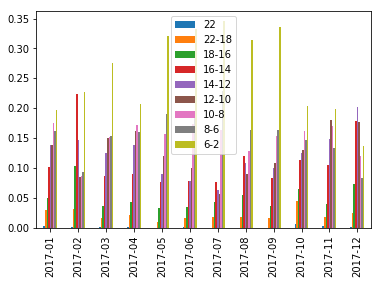

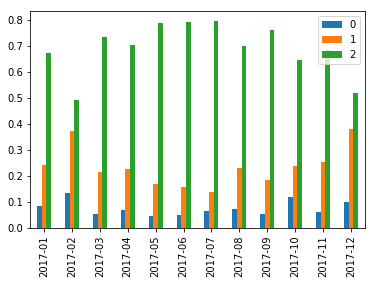

In [31]:
nine_band = pd.DataFrame(df, columns=['22','22-18','18-16','16-14','14-12','12-10','10-8','8-6','6-2'], dtype=np.int64)   
sum_nine_band = nine_band.sum(1) 
nine_band_relative = nine_band.divide(sum_nine_band, axis=0)

long_period = nine_band[['22','22-18','18-16']].sum(axis=1)                                                                     
mid_period = nine_band[['16-14','14-12']].sum(axis=1)   
short_period = nine_band[['12-10','10-8','8-6','6-2']].sum(axis=1) 
period_group = pd.concat([long_period, mid_period, short_period], axis=1)                                                 
period_group_relative = period_group.divide(sum_nine_band, axis=0)

monthly_period_band = nine_band_relative.groupby(df.index.strftime('%Y-%m')).mean()
monthly_period_band.plot.bar()
plot.show()

monthly_period_mix = period_group_relative.groupby(df.index.strftime('%Y-%m')).mean()
monthly_period_mix.plot.bar()
plot.show()

## Notes

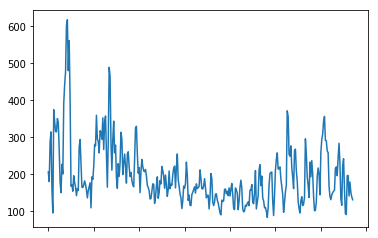

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:10: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()


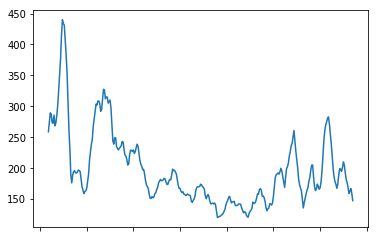

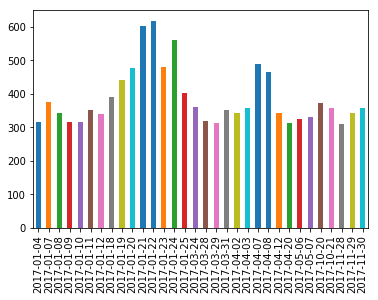

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot

df = pd.read_table('~/dev/lighthouse/scripts/new.txt', delim_whitespace=True, header=2, index_col=0, parse_dates=True)
size_by_day = df.groupby(df.index.strftime('%Y-%m-%d'))['(CM)'].max()
size_by_day.plot()
plot.show()

moving_avg = pd.rolling_mean(size_by_day, 10)
moving_avg.plot()
plot.show()

deads_days = size_by_day[size_by_day > 300]
deads_days.plot.bar()
plot.show()